## Unit Testing with pytest

### What is a unit test
**Unit** - the smallest working part that can be tested.
- Examples of units: functions, methods, classes, modules, etc.

**Unit testing** - software testing method.
- Unit testing allows one to scrutinize the correctness of a unit.

**Test case** - a set of unit inputs and expected outputs.
- Test case summarizes a particular piece of the problem.

### Why to use unit tests
**Unit tests** - are a foundation for testing "the bigger picture" of the software.
**Use cases**:
- When bugs found
- During development
- After implemented changes

### How to create a unit test
Step-by-step:
1. Decide which units to test
2. Define test cases (the creative part):
   - "What are the possible unit outcomes?"
   - "How can one use the unit?"
   - "How should the unit behave in all those cases?"
3. Write code for each test case
4. Run the tests and analyze the results

### Creating a unit test: example
Unit to test:

In [ ]:
# Function for a sum of elements
def sum_of_arr(array:list) -> int:
    return sum(array)

### Test cases:
1. Input is a list of numbers (as expected) - should return the sum
2. Input is an empty list - should return 0
3. Input is a list containing one number - should return the number

### Creating a unit test: code

In [ ]:
# Test Case 1: regular array
def test_regular():
    assert sum_of_arr([1, 2, 3]) == 6
    assert sum_of_arr([100, 150]) == 250

In [ ]:
# Test Case 2: empty list
def test_empty():
    assert sum_of_arr([]) == 0

In [ ]:
# Test Case 3: one number
def test_one_number():
    assert sum_of_arr([10]) == 10
    assert sum_of_arr([0]) == 0

In [ ]:
# Practice 1

import pytest

def factorial(n):
    if n == 0: return 1
    elif (type(n) == int):
        return n * factorial(n-1)
    else: return -1

# Test case: expected input
def test_regular():
    assert factorial(5) == 120

# Test case: zero input
def test_zero():
    assert factorial(0) == 1

# Test case: input of a wrong type
def test_str():
    assert factorial('5') == -1

## Feature Testing with pytest

### What is a feature test
Feature
- a software system functionality.
- satisfies a particular user's requirement.

Features
- are wider that units.
- End-user can use features.

Feature testing
- software testing method.
- verify the behavior of a specific feature.

Examples:
- Data distribution check
- Report preparation

### Units vs. features: personal computer

| Units                    | Features      |
|--------------------------|--------------|
| Each individual button   | Keyboard     |
| Pixels on the screen     | Screen       |
| LED diodes               | Illumination |
| Blocks on the disk       | File system  |


### Why do we use feature tests
**Feature testing helps**:
- To test things at the scope of the user interaction with a system.

The scope is wider than units:
- One unit does not work - does not mean the feature is NOT OK.

Vice versa:
- All units work as expected - does not mean the feature is OK.

### Feature test example: setup
Setup and defining the feature code:

In [ ]:
# Setup
import pandas as pd
import pytest

df = pd.read_csv('laptops.csv')

# Filter feature
def filter_data_by_manuf(df, manufacturer_name): 
    filtered_df = df[df["Manufacturer"] == manufacturer_name]
    return filtered_df

### Feature test example: testing
Testing code:

In [ ]:
# Feature test function
def test_unique():    
    manuf_name = 'Apple'   
    filtered = filter_data_by_manuf(df, manuf_name)
    assert filtered\       
        ['Manufacturer'].nunique() == 1
    assert filtered\     
        ['Manufacturer'].unique() == [manuf_name]

In [ ]:
# Practice 2

# Don't forget to run
# pytest agg_with_sum.py 
# in the CLI to actually run the test!

import pandas as pd
import pytest

# Fixture to prepare the data
@pytest.fixture
def get_df():
    return pd.read_csv(
        'https://assets.datacamp.com/production/repositories/6253/datasets/757c6cb769f7effc5f5496050ea4d73e4586c2dd/laptops_train.csv'
    )

# Aggregation feature
def agg_with_sum(data, group_by_column, aggregate_column):
    return data.groupby(group_by_column)[aggregate_column].sum()

# Test function
def test_agg_feature(get_df):
    # Aggregate preparation
    aggregated = agg_with_sum(get_df, 'Manufacturer', 'Price')

    # Test the type of aggregated is pd.Series
    assert isinstance(aggregated, pd.Series)

    # Test the number of rows in aggregated is more than 0
    assert len(aggregated) > 0

    # Test the data type of aggregated values is either int or float
    assert aggregated.dtype in [int, float, 'int64', 'float64']

## Integration Testing with Pytest

### What is integration testing?
- **Integration testing** - software testing method, that allows to verify that an interaction behaves normally.
- **Integration** - an interaction between 2 or more modules inside of a system.

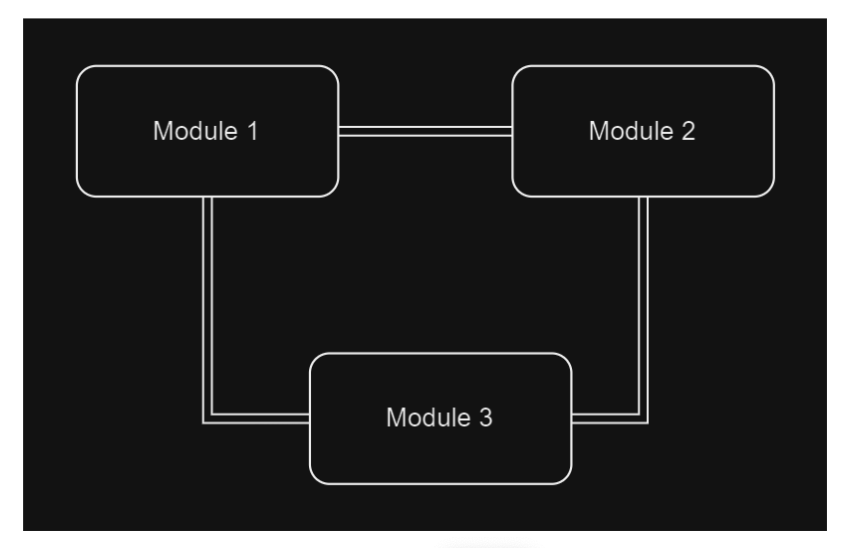

### Integrations in real-life projects
Examples:
- Power cable
- Internet connection
- File reading driver
- Database connection
- Application Programming Interface (API) integration

### What can go wrong
Potential integration problems:
- Lost connection
- Loss of data
- Interaction delays
- Low bandwidth
- Version conflicts
- Interface mismatch
- Others

### Example of integration testing

In [ ]:
import pytest, os

@pytest.fixture
def setup_file():
    # Create temporary file    
    file = "test_file.txt"
    with open(file, "w") as f1:  
        f1.write("Test data 1")
        yield file    
        os.remove(file)

def test_fs(setup_file):
    file = setup_file
    # Check that the file was created successfully
    assert os.path.exists(file)

In [ ]:
# Practice 3

import pandas as pd
import pytest

# Fixture to read the dataframe
@pytest.fixture
def get_df():
    return pd.read_csv('https://assets.datacamp.com/production/repositories/6253/datasets/757c6cb769f7effc5f5496050ea4d73e4586c2dd/laptops_train.csv')

# Integration test function
def test_get_df(get_df):
    # Check the type
    assert isinstance(get_df, pd.DataFrame)
    # Check the number of rows
    assert len(get_df) > 0

## Performance Testing with Pytest

### What is performance testing
- **Performance** - how efficiently does software utilizes the resources of the system to accomplish a task.
- **Performance Testing** - is a type of testing that measures software performance.

### When performance testing is important
| Resources        | Cases                              |
|------------------|-----------------------------------|
| Execution Time   | Website speed optimization        |
| CPU              | App receiving millions of requests|
| RAM              | Path planning for a robot vacuum  |
| Other resources  |                                   |

### Benchmark fixture
Installation:

In [ ]:
pip install pytest-benchmark

In [ ]:
# Example_1.py
import time

def test_func(benchmark):    
    benchmark(time.sleep, 1)

**CLI Command**: `pytest Example_1.py`

### Benchmark decorator

In [ ]:
# Example_2.py
import time

def test_func(benchmark):  
    @benchmark
    
def sleep_for_1_sec():   
    time.sleep(1)

**CLI Command**: `pytest Example_2.py`

In [ ]:
# Practice 4

def create_list():
    return [i for i in range(1000)]
def create_set():
    return set([i for i in range(1000)])
def find(it, el=50):
    return el in it

# Write the performance test for a list
def test_list(benchmark):
    benchmark(find, it=create_list())

# Write the performance test for a set
def test_set(benchmark):
    benchmark(find, it=create_set())

In [ ]:
# Practice 5

def test_list(benchmark):
    # Add decorator here
    @benchmark
    def iterate_list():
        # Complete the loop here
        for i in [i for i in range(1000)]:
            pass

def test_set(benchmark):
    # Add decorator here
    @benchmark
    def iterate_set():
        # Complete the loop here
        for i in {i for i in range(1000)}:
            pass